In [16]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter

import re

from gensim.models import KeyedVectors

In [2]:
event_clusters = pd.read_csv('/Users/user/Documents/github/CBW/data/Events.csv', encoding='ISO-8859-1')
event_clusters.head(5)

,Event,Cluster
0,"sisters, group, named",0
1,"great grandfather, named",0
2,"noblewoman, named",0
3,"nobleman, named",0
4,"European country, other named",0


In [5]:
all_events = event_clusters['Event']

In [6]:
all_events

0                            sisters, group, named
1                         great grandfather, named
2                                noblewoman, named
3                                  nobleman, named
4                    European country, other named
5                               sons, group, named
6                           brothers, group, named
7                                       son, named
8                          daughters, group, named
9                                  daughter, named
10            youthful desire for vocation or work
11           elocution, correct or proper language
12                           supernatural or ghost
13                               dying or deathbed
14                               dream or dreaming
15                       emigration or immigration
16                           energetic or untiring
17                      faith, doubting or lacking
18         failure as persona's misconduct or flaw
19                 doubt of occ

In [14]:
for each in all_events:
    print(each)

sisters, group, named
great grandfather, named
noblewoman, named
nobleman, named
European country, other named
sons, group, named
brothers, group, named
son, named
daughters, group, named
daughter, named
youthful desire for vocation or work
elocution, correct or proper language
supernatural or ghost
dying or deathbed
dream or dreaming
emigration or immigration
energetic or untiring
faith, doubting or lacking
failure as persona's misconduct or flaw
doubt of occupation or vocation
speculation, possible motives or causes
family, occupation of parents or ancestors
fans or admirers without personal access
female patient, private or rich
figureOrImage, ghost or spirit
figureOrImage, home or shelter
figureOrImage, sailor or mariner
figureOrImage, synecdoche or metonymy
food or sustenance
food, feeding or eating
enslaved person or persons
taste
test or trial, physical
temptation of status or goods
attachment, family bonding or not
willful or stubborn
barn or stable
bathing or washing own body


In [18]:
# def prepend_slow(infile, outfile, line):
#     """
#     Slower way to prepend the line by re-creating the inputfile.
#     """
#     with open(infile, 'r',encoding = 'utf8') as fin:
#         with open(outfile, 'w',encoding = 'utf8') as fout:
#             fout.write(line + "\n")
#             for line in fin:
#                 fout.write(line)

In [23]:
#infile = "/Users/user/Documents/github/CBW/data/glove.twitter.27B.200d.txt"

In [24]:
#outfile = "/Users/user/Documents/github/CBW/data/glove.twitter.27B.200d_out.txt"

In [ ]:
#prepend_slow(infile, outfile, line)

In [25]:
model = KeyedVectors.load_word2vec_format("glove.twitter.27B.200d_out.txt")

In [26]:
glove_embedding = {}
not_present = []

for each in all_events:
    words = re.split('; |, | |-|_',each)
    all_words = [model[each.lower()] for each in words if each.lower() in model]
    
    if(len(all_words) > 0):
        glove_embedding[each] = np.mean(all_words,axis = 0)
        
    else:
        not_present.append(each)

In [28]:
glove_embedding

{'sisters, group, named': array([ 9.82667040e-03, -1.07640006e-01, -9.18665994e-03, -3.02377671e-01,
        -1.60179988e-01, -5.51626682e-01,  5.07573307e-01,  4.15500998e-01,
         4.57853317e-01, -5.84363341e-01, -5.15856683e-01,  7.92428255e-02,
        -8.85393322e-01, -2.39923298e-02,  5.97453356e-01,  4.02206659e-01,
         4.25426662e-02,  4.67853308e-01,  1.12675004e-01, -1.21037662e-01,
         3.34152669e-01,  1.72667667e-01, -2.96450019e-01, -4.21456665e-01,
        -2.27093339e-01,  9.94880021e-01, -1.33180663e-01, -3.06953341e-01,
        -3.56596671e-02,  1.04296677e-01,  4.84950036e-01, -1.20969988e-01,
        -2.54626334e-01, -8.34600031e-02, -2.50806659e-01,  3.23776603e-02,
         2.27886662e-01,  6.36433288e-02,  1.80559993e-01,  1.63886651e-01,
         6.90496683e-01, -1.22021340e-01,  9.05366838e-02,  3.00066695e-02,
        -2.42802992e-01, -7.05073327e-02,  1.74883321e-01, -2.33586669e-01,
         6.31933361e-02, -1.07953340e-01, -2.33626664e-01,  4.0

In [37]:
test = np.array(glove_embedding.values())

In [39]:
glove_embedding.keys()

dict_keys(['sisters, group, named', 'great grandfather, named', 'noblewoman, named', 'nobleman, named', 'European country, other named', 'sons, group, named', 'brothers, group, named', 'son, named', 'daughters, group, named', 'daughter, named', 'youthful desire for vocation or work', 'elocution, correct or proper language', 'supernatural or ghost', 'dying or deathbed', 'dream or dreaming', 'emigration or immigration', 'energetic or untiring', 'faith, doubting or lacking', "failure as persona's misconduct or flaw", 'doubt of occupation or vocation', 'speculation, possible motives or causes', 'family, occupation of parents or ancestors', 'fans or admirers without personal access', 'female patient, private or rich', 'figureOrImage, ghost or spirit', 'figureOrImage, home or shelter', 'figureOrImage, sailor or mariner', 'figureOrImage, synecdoche or metonymy', 'food or sustenance', 'food, feeding or eating', 'enslaved person or persons', 'taste', 'test or trial, physical', 'temptation of st

In [41]:
dataDict = glove_embedding
orderedNames = glove_embedding.keys()

dataMatrix = np.array([dataDict[i] for i in orderedNames])

print(dataMatrix)

[[ 0.00982667 -0.10764001 -0.00918666 ... -0.11648367 -0.12763403
   0.08653333]
 [-0.01187467  0.06096001 -0.09971666 ...  0.18415    -0.23007403
  -0.26058432]
 [-0.10286     0.1893      0.16453    ...  0.072119    0.0022979
  -0.3617    ]
 ...
 [-0.17963266 -0.144322    0.12241668 ...  0.08704003  0.32058
   0.01899   ]
 [-0.47636     0.50906     0.50065    ...  0.022327    0.38099
  -0.61944   ]
 [ 0.004967   -0.33021    -0.45104    ...  0.49697    -0.32501
   0.0531    ]]


In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataMatrix)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [43]:
finalDf = pd.concat([principalDf, event_clusters[['Cluster']]], axis = 1)

In [53]:
labels=set(finalDf.Cluster.values)

In [69]:
labels=str(labels)

In [57]:
import matplotlib.pyplot as plt

In [62]:
finalDf.head()

,principal component 1,principal component 2,Cluster
0,-0.967119,0.237041,0
1,-0.636212,0.313668,0
2,-0.714164,0.462236,0
3,-0.714164,0.462236,0
4,-1.100002,0.056216,0


In [63]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [65]:
x = finalDf['principal component 1']
y = finalDf['principal component 2']


In [77]:
labels= np.array(finalDf.Cluster.unique().tolist())

In [78]:
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [80]:
finalDf.head()

,principal component 1,principal component 2,Cluster
0,-0.967119,0.237041,0
1,-0.636212,0.313668,0
2,-0.714164,0.462236,0
3,-0.714164,0.462236,0
4,-1.100002,0.056216,0


Text(0.5,1,'A colored bubble plot')

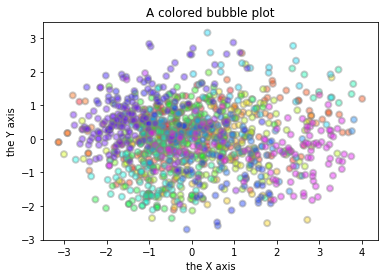

In [81]:
plt.scatter(x, y, c=finalDf.Cluster, cmap="gist_rainbow", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")